In [3]:
# !pip install sentence_transformers
from sentence_transformers import SentenceTransformer, util
import torch
import csv

# Load the pre-trained Sentence Transformer models
models = [
    SentenceTransformer("Sakil/sentence_similarity_semantic_search"),
    SentenceTransformer("sentence-transformers/all-mpnet-base-v2"),
    SentenceTransformer("sentence-transformers/multi-qa-MiniLM-L6-cos-v1"),
    SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v2"),
    SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")
]

# Encode the query and passages
query = 'I am a critical thinker'
passages = ['That is happy dog', 'That is very happy person', 'Today is a sunny day']

results = []

for i, model in enumerate(models, start=1):
    model_name = f"M{i}"

    query_embedding = model.encode(query, convert_to_tensor=True)
    passage_embeddings = model.encode(passages, convert_to_tensor=True)

    # Normalize embeddings
    query_embedding /= query_embedding.norm(dim=-1, keepdim=True)
    passage_embeddings /= passage_embeddings.norm(dim=-1, keepdim=True)

    # Compute similarity scores using different metrics
    cosine_similarity_scores = util.pytorch_cos_sim(query_embedding, passage_embeddings)

    # Use unsqueeze to make the tensors 2D before computing distances
    euclidean_distances = torch.cdist(query_embedding.unsqueeze(0), passage_embeddings.unsqueeze(0), p=2)
    manhattan_distances = torch.cdist(query_embedding.unsqueeze(0), passage_embeddings.unsqueeze(0), p=1)
    minkowski_distances = torch.cdist(query_embedding.unsqueeze(0), passage_embeddings.unsqueeze(0), p=3)

    # Save only the max for cosine similarity and min for distances
    model_results = {
        "Model": model_name,
        "Cosine Similarity": max(cosine_similarity_scores[0].tolist()),
        "Euclidean Distance": euclidean_distances.min().item(),  # Extract the minimum value
        "Manhattan Distance": manhattan_distances.min().item(),  # Extract the minimum value
        "Minkowski Distance": minkowski_distances.min().item(),  # Extract the minimum value
    }

    # Extract the minimum and maximum values for scaling
    min_euclidean_distance = euclidean_distances.min().item()
    max_euclidean_distance = euclidean_distances.max().item()

    min_manhattan_distance = manhattan_distances.min().item()
    max_manhattan_distance = manhattan_distances.max().item()

    min_minkowski_distance = minkowski_distances.min().item()
    max_minkowski_distance = minkowski_distances.max().item()

    # Apply min-max scaling to the distances
    scaled_euclidean_distance = (euclidean_distances - min_euclidean_distance) / (max_euclidean_distance - min_euclidean_distance)
    scaled_manhattan_distance = (manhattan_distances - min_manhattan_distance) / (max_manhattan_distance - min_manhattan_distance)
    scaled_minkowski_distance = (minkowski_distances - min_minkowski_distance) / (max_minkowski_distance - min_minkowski_distance)

    # Create the scaled model_results dictionary
    scaled_model_results = {
      "Model": model_name,
      "Cosine Similarity": max(cosine_similarity_scores[0].tolist()),
      "Scaled Euclidean Distance": scaled_euclidean_distance.mean().item(),
      "Scaled Manhattan Distance": scaled_manhattan_distance.mean().item(),
      "Scaled Minkowski Distance": scaled_minkowski_distance.mean().item(),
    }

    results.append(scaled_model_results)

    # Save results to CSV
    csv_file_path = 'similarity_results.csv'
    with open(csv_file_path, 'w', newline='') as csv_file:
        fieldnames = ['Model', 'Cosine Similarity', 'Scaled Euclidean Distance', 'Scaled Manhattan Distance',
         'Scaled Minkowski Distance']
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        csv_writer.writeheader()
        csv_writer.writerows(results)

    print(f"Similarity scores for model {i} has been saved to {csv_file_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.75k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/562 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/383 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Similarity scores for model 1 has been saved to similarity_results.csv
Similarity scores for model 2 has been saved to similarity_results.csv
Similarity scores for model 3 has been saved to similarity_results.csv
Similarity scores for model 4 has been saved to similarity_results.csv
Similarity scores for model 5 has been saved to similarity_results.csv


In [4]:
pip install sentence_transformers

In [5]:
%pip install Topsis-Ishan-102103408

In [6]:
from Topsis_Ishan_102103408.topsis import topsis
inputFile="similarity_results.csv"
weights="1,1,1,1"
impacts="+,-,-,-"
resultFile="result_1.csv"
topsis(inputFile, weights, impacts, resultFile)

  Model  Cosine Similarity  Scaled Euclidean Distance  \
0    M1           0.966409                   0.581379   
1    M2           0.898781                   0.452293   
2    M3           0.940434                   0.507496   
3    M4           0.915098                   0.450659   
4    M5           0.889267                   0.488196   

   Scaled Manhattan Distance  Scaled Minkowski Distance  
0                   0.565843                   0.591381  
1                   0.457227                   0.449569  
2                   0.513766                   0.504964  
3                   0.437510                   0.466270  
4                   0.501074                   0.479805  
   Cosine Similarity  Scaled Euclidean Distance  Scaled Manhattan Distance  \
0           0.468537                   0.521768                   0.509030   
1           0.435749                   0.405917                   0.411319   
2           0.455943                   0.455460                   0.462181 

In [7]:
from Topsis_Ishan_102103408.topsis import topsis
inputFile="similarity_results.csv"
weights="0.5,0.25,0.25,0.25"
impacts="+,-,-,-"
resultFile="result_2.csv"
topsis(inputFile, weights, impacts, resultFile)

  Model  Cosine Similarity  Scaled Euclidean Distance  \
0    M1           0.966409                   0.581379   
1    M2           0.898781                   0.452293   
2    M3           0.940434                   0.507496   
3    M4           0.915098                   0.450659   
4    M5           0.889267                   0.488196   

   Scaled Manhattan Distance  Scaled Minkowski Distance  
0                   0.565843                   0.591381  
1                   0.457227                   0.449569  
2                   0.513766                   0.504964  
3                   0.437510                   0.466270  
4                   0.501074                   0.479805  
   Cosine Similarity  Scaled Euclidean Distance  Scaled Manhattan Distance  \
0           0.234268                   0.130442                   0.127257   
1           0.217874                   0.101479                   0.102830   
2           0.227971                   0.113865                   0.115545 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
csv_file_path = 'similarity_results.csv'
df = pd.read_csv(csv_file_path)

# Display basic statistics
print("Basic Statistics:")
print(df.describe())


Basic Statistics:
       Cosine Similarity  Scaled Euclidean Distance  \
count           5.000000                   5.000000   
mean            0.921998                   0.496005   
std             0.031505                   0.053500   
min             0.889267                   0.450659   
25%             0.898781                   0.452293   
50%             0.915098                   0.488196   
75%             0.940434                   0.507496   
max             0.966409                   0.581379   

       Scaled Manhattan Distance  Scaled Minkowski Distance  
count                   5.000000                   5.000000  
mean                    0.495084                   0.498398  
std                     0.050348                   0.055792  
min                     0.437510                   0.449569  
25%                     0.457227                   0.466270  
50%                     0.501074                   0.479805  
75%                     0.513766                   0

<ipython-input-9-278669d712c8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


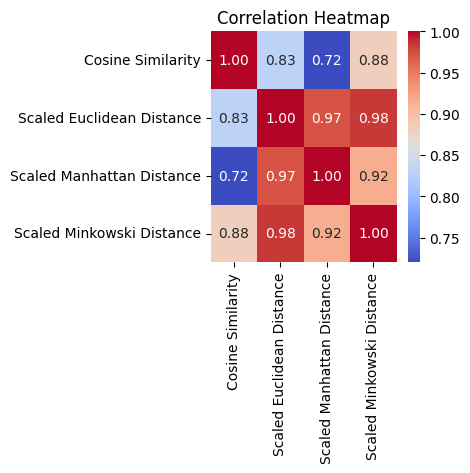

In [9]:
# Correlation Heatmap
plt.figure(figsize=(3, 3))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()